In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Step 1: Download the Wine data from the UCI machine learning repository (Wine dataset- UCI Repository)

In [2]:
col_names=["class","Alcohol", "Malic acid", "Ash", 
           "Alcalinity of ash", "Magnesium", "Total phenols", 
           "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
           "Hue", "OD280/OD315 of diluted wines", "Proline"]
df=pd.read_csv("wine-data.csv", header=None, names=col_names,index_col=None)
df_wine=df.drop("class",axis=1)

In [3]:
df_wine.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Step 2: Do a Principal Components Analysis (PCA) on the data. Please include (copy- paste) the relevant software outputs in your submission while answering the following questions.

In [4]:
pcs = PCA()
pcs.fit(preprocessing.scale(df_wine.dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,2.1754,1.5846,1.2059,0.9613,0.9263,0.8033,0.7444,0.5920,0.5390,0.5023,0.4765,0.412,0.3224
Proportion of variance,0.3620,0.1921,0.1112,0.0707,0.0656,0.0494,0.0424,0.0268,0.0222,0.0193,0.0174,0.013,0.0080
Cumulative proportion,0.3620,0.5541,0.6653,0.7360,0.8016,0.8510,0.8934,0.9202,0.9424,0.9617,0.9791,0.992,1.0000


In [5]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=df_wine.columns)
pcsComponents_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
Malic acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
Alcalinity of ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
Magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
Total phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
Nonflavanoid phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
Proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
Color intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


#### a. Enumerate the insights you gathered during your PCA exercise. Please do not clutter your report with too many insignificant insights as it will dilute the value of your other significant findings.

#### weight examination for PC1

PC1 explains 36.2% of variation<br>
PC1 measures the balance between 2 group of chemicals <br>
Flavanoids, Total phenols, OD280/OD315 of diluted wines, Proanthocyanins and Hue (Large Positive Values)<br>
vs <br>
Nonflavanoid phenols, Malic acid and Alcalinity of ash (Large Negetive Values)<br>
This means that wines that are high on Flavanoids, Total phenols, OD280/OD315 of diluted wines,Proanthocyanins and Hue , are low on Nonflavanoid phenols, Malic acid and Alcalinity of ash. <br>After a quick online search, I found that these attributes are associated with good quality wine and so PC1 is actually a measure of the quality of wine.

#### weight examination for PC2
PC2 explains 19.21% of variation in data<br>
it is most affected by the color intensity, alcohol, Proline, Ash and Magnesium in wine (large negetive values).<br>
It shows a balance of Hue and color intensity in the wine. <br>
PC2 is measure of color intensity, texture and mouthfeel of the wine


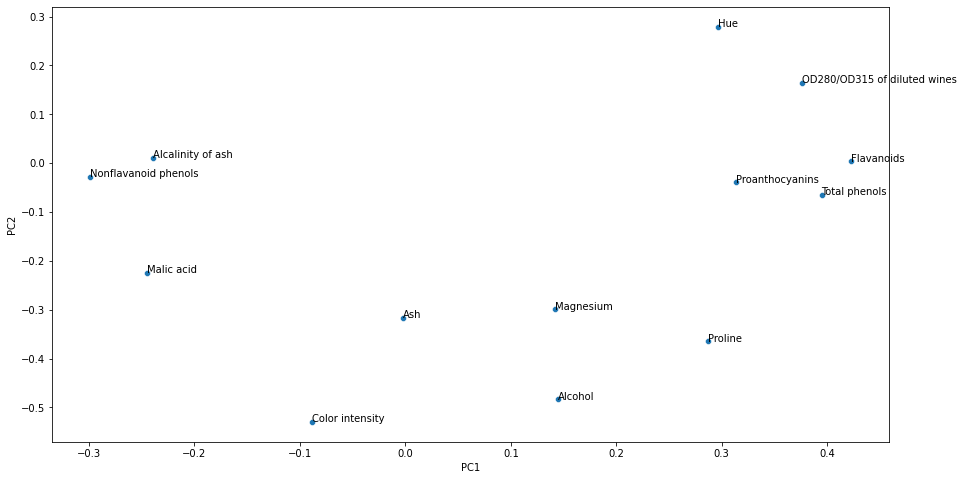

In [6]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=pcsComponents_df, x="PC1", y="PC2")
# Add labels to the data points

for i in range(len(pcsComponents_df)):
    plt.text(pcsComponents_df['PC1'][i], pcsComponents_df['PC2'][i],pcsComponents_df.index[i])

# Show the plot

plt.show()

#### weight examination for PC3

PC3 explains 11.12% of variation in data<br>
It is most impacted by the Ash and Alcalinity of ash in the data.

#### weight examination for PC4
PC4 explains only 7.07% of variation in data<br>
PC4 capture the balance between Magnesium and Hue vs Malic acid and Proanthocyanins

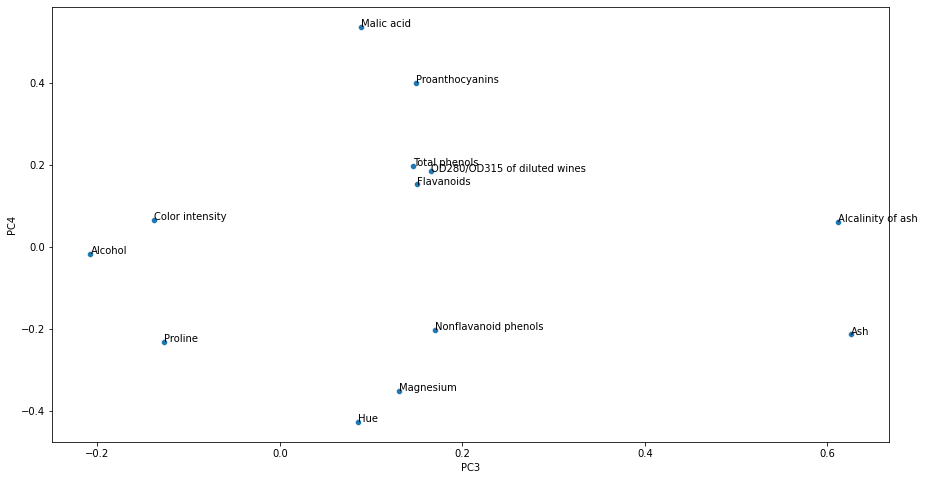

In [7]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=pcsComponents_df, x="PC3", y="PC4")
# Add labels to the data points

for i in range(len(pcsComponents_df)):
    plt.text(pcsComponents_df['PC3'][i], pcsComponents_df['PC4'][i],pcsComponents_df.index[i])

# Show the plot

plt.show()

#### b. What are the social and/or business values of those insights, and how the value of those insights can be harnessed―enumerate actionable recommendations for the identified stakeholder in this analysis?

The values that is derived from the data is that wines that are of good quality are high on Flavanoids, Total phenols, OD280/OD315 of diluted wines,Proanthocyanins and Hue and are low on Nonflavanoid phenols, Malic acid and Alcalinity of ash. The mouthfeel and hue vs color intensity of wine also matters. While cultivating grapes, it is advised that the minerals like magnesium, Ash are put in proper quantities, so that the final product has a proper texture and mouthfeel.More quantity Nonflavanoid phenols, Malic acid and Alcalinity of ash in wne could mean bitter, acidic wine, so these chemicals should be reduced in wine.

## Step 3: Do a cluster analysis―you may try different algorithms or approaches and go with the one that you find most appropriate― using (i) all chemical measurements (ii) using two most significant PC scores. Pleaseinclude (copy-paste) the relevant software outputs in your submission while answering the following questions.

In [8]:
df_pca=pd.DataFrame(pcs.transform(preprocessing.scale(df_wine.dropna(axis=0))), columns=pcsSummary_df.columns)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


### (i) Cluster using all chemical measurements

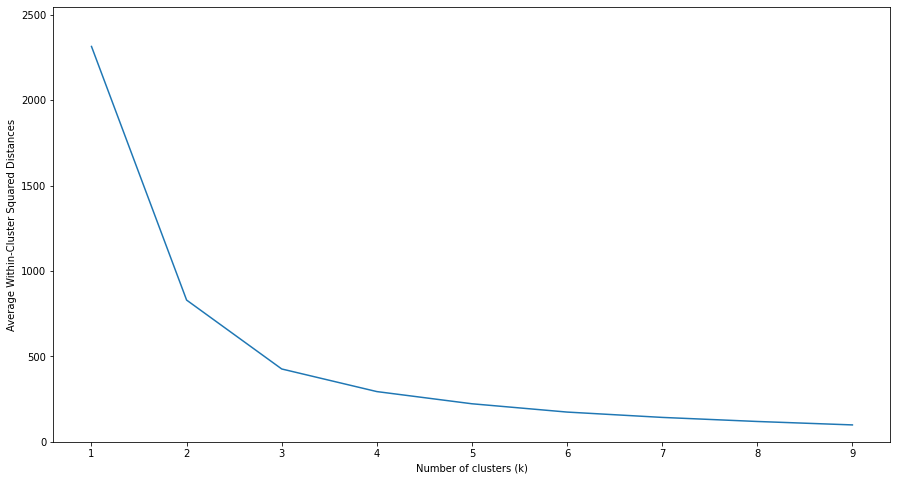

In [9]:
from sklearn.cluster import KMeans
inertia=[]
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', figsize=(15,8))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

The elbow is at 3, so we will take 3 clusters

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_pca)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_pca.index)

clus={}
for key, item in memb.groupby(memb):
    clus[key]=item.index
    print(key, ': ', item.index)

0 :  Int64Index([ 61,  83, 118, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
            153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
            166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64')
1 :  Int64Index([ 59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
             74,  75,  76,  77,  78,  79,  80,  81,  82,  84,  85,  86,  87,
             88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
            102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
            115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
            129],
           dtype='int64')
2 :  Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47

In [11]:
df_desc=df.loc[clus[0]].describe()
df_desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
std,0.237635,0.521855,1.093366,0.199023,2.408001,11.073693,0.349497,0.323911,0.123029,0.411335,2.345596,0.120383,0.274850,120.723554
min,2.000000,12.200000,1.240000,1.980000,16.000000,80.000000,0.980000,0.340000,0.170000,0.550000,3.400000,0.480000,1.270000,372.000000
25%,3.000000,12.780000,2.585000,2.290000,19.750000,89.000000,1.445000,0.580000,0.400000,0.835000,5.340000,0.590000,1.530000,520.000000
50%,3.000000,13.110000,3.270000,2.380000,21.000000,97.000000,1.650000,0.700000,0.470000,1.100000,7.300000,0.670000,1.680000,620.000000
75%,3.000000,13.495000,3.905000,2.590000,22.750000,106.000000,1.815000,1.025000,0.530000,1.350000,9.105000,0.765000,1.825000,690.000000
max,3.000000,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.590000,0.630000,2.700000,13.000000,0.980000,2.470000,880.000000


So the 1st identified cluster is of class-3 wine, as per the data's metadata, we should have 48 class-3 wine entries, wherease out cluster is of 51 records, which is very close.

In [12]:
df_desc=df.loc[clus[1]].describe()
df_desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,66.0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2.0,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
std,0.0,0.535688,1.004612,0.321337,3.171009,13.954747,0.538565,0.710083,0.121286,0.566801,0.869559,0.201031,0.467202,141.739332
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.670000,278.000000
25%,2.0,11.847500,1.220000,2.000000,18.025000,86.000000,1.905000,1.640000,0.270000,1.350000,2.500000,0.930000,2.465000,406.250000
50%,2.0,12.235000,1.610000,2.250000,20.000000,88.000000,2.200000,2.030000,0.360000,1.585000,2.900000,1.040000,2.855000,491.500000
75%,2.0,12.420000,2.127500,2.420000,21.900000,98.000000,2.560000,2.487500,0.430000,1.870000,3.360000,1.212500,3.160000,625.000000
max,2.0,13.860000,5.800000,3.230000,28.500000,151.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,886.000000


So the 1st identified cluster is of class-2 wine, as per the data's metadata, we should have 71 class-2 wine entries, wherease out cluster is of 66 records, which is also very close.

In [13]:
df_desc=df.loc[clus[2]].describe()
df_desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
std,0.179556,0.491826,0.681215,0.226533,3.011894,13.184732,0.341341,0.401444,0.069745,0.442083,1.302997,0.119449,0.360331,219.605634
min,1.000000,12.470000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,2.600000,0.820000,2.510000,680.000000
25%,1.000000,13.300000,1.660000,2.290000,16.000000,98.000000,2.600000,2.680000,0.250000,1.660000,4.500000,1.010000,2.870000,985.000000
50%,1.000000,13.740000,1.760000,2.440000,17.000000,105.000000,2.800000,2.970000,0.290000,1.920000,5.400000,1.070000,3.170000,1080.000000
75%,1.000000,14.100000,1.920000,2.610000,18.800000,115.000000,3.000000,3.240000,0.320000,2.100000,6.200000,1.130000,3.440000,1280.000000
max,2.000000,14.830000,4.040000,3.220000,30.000000,162.000000,3.880000,3.930000,0.500000,3.280000,8.900000,1.310000,4.000000,1680.000000


So the 1st identified cluster is of class-1 wine, as per the data's metadata, we should have 59 class-1 wine entries, wherease out cluster is of 61 records, which is also very close.

### (ii) cluster using using two most significant PC scores

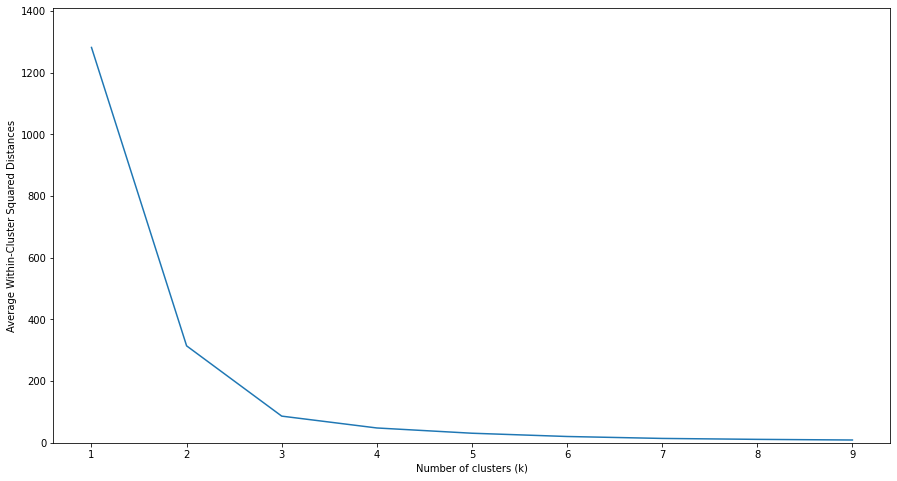

In [14]:
inertia=[]
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca[["PC1","PC2"]])
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', figsize=(15,8))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

The elbow is at 3, so we will take 3 clusters

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_pca[["PC1","PC2"]])
# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_pca[["PC1","PC2"]].index)

clus={}
for key, item in memb.groupby(memb):
    clus[key]=item.index
    print(key, ': ', item.index)

0 :  Int64Index([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  72,
             74,  75,  76,  77,  78,  79,  80,  81,  82,  84,  85,  86,  87,
             88,  89,  90,  91,  92,  93,  94,  96,  97,  99, 100, 101, 102,
            103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
            116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129],
           dtype='int64')
1 :  Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
             52,  53,  54,  55,  56,  57,  58,  71,  73,  95,  98, 121],
           dtype='int64')
2 :  Int64Index([ 83, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
            142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
            

In [16]:

df_pca.loc[df_pca.index.isin(clus[0]), 'label'] = '1'
df_pca.loc[df_pca.index.isin(clus[1]), 'label'] = '2'
df_pca.loc[df_pca.index.isin(clus[2]), 'label'] = '3'


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

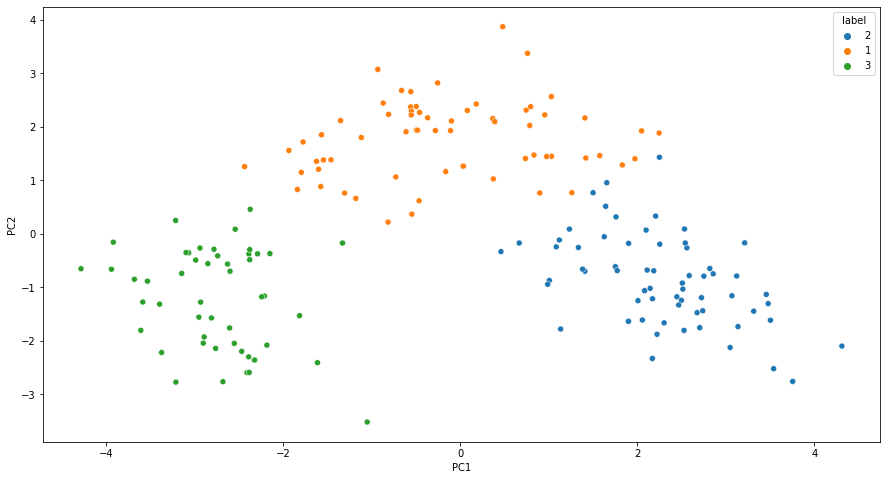

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="label")

In [18]:
df_desc=df.loc[clus[0]].describe()
df_desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,2.0,12.238308,1.931385,2.219385,19.898462,92.830769,2.204308,1.989231,0.365538,1.587692,2.992615,1.051631,2.769231,506.353846
std,0.0,0.499836,1.025503,0.296284,3.015765,13.764276,0.503059,0.572766,0.121128,0.589074,0.843142,0.203526,0.486522,142.144560
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.870000,1.250000,1.990000,18.000000,85.000000,1.890000,1.600000,0.280000,1.350000,2.500000,0.920000,2.440000,392.000000
50%,2.0,12.250000,1.610000,2.240000,20.000000,88.000000,2.200000,2.010000,0.370000,1.530000,2.900000,1.040000,2.830000,488.000000
75%,2.0,12.430000,2.160000,2.400000,21.500000,98.000000,2.550000,2.270000,0.430000,1.870000,3.300000,1.190000,3.140000,625.000000
max,2.0,13.670000,5.800000,2.920000,28.500000,151.000000,3.500000,3.180000,0.660000,3.580000,5.750000,1.710000,3.640000,886.000000


So the 1st identified cluster is of class-2 wine, previously we had 66 class-2 wine entries for all columns now there are only 65 records, so both the results are very close.

In [19]:
df_desc=df.loc[clus[1]].describe()
df_desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000
mean,1.078125,13.659219,1.975781,2.463750,17.596875,107.312500,2.859688,3.012656,0.290000,1.921719,5.406250,1.069688,3.157188,1082.56250
std,0.270490,0.574446,0.677457,0.247113,3.391959,13.456426,0.346328,0.481823,0.072725,0.431544,1.304676,0.123507,0.361314,250.52224
min,1.000000,11.560000,1.070000,2.040000,11.200000,86.000000,2.200000,2.190000,0.170000,1.250000,2.600000,0.820000,2.510000,410.00000
25%,1.000000,13.287500,1.650000,2.287500,16.000000,98.000000,2.600000,2.680000,0.240000,1.660000,4.470000,1.002500,2.865000,932.75000
50%,1.000000,13.735000,1.755000,2.445000,17.050000,104.500000,2.850000,2.975000,0.285000,1.895000,5.325000,1.070000,3.165000,1065.00000
75%,1.000000,14.070000,1.927500,2.620000,18.925000,115.250000,3.000000,3.255000,0.320000,2.085000,6.200000,1.135000,3.442500,1272.50000
max,2.000000,14.830000,4.040000,3.230000,30.000000,162.000000,3.880000,5.080000,0.500000,3.280000,8.900000,1.360000,4.000000,1680.00000


So the  cluster is of class-1 wine, previously we had 61 class-1 wine entries for all columns now there are only 64 records, so both the results are very close

In [20]:
df_desc=df.loc[clus[2]].describe()
df_desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
std,0.142857,0.524898,1.079136,0.183520,2.239868,10.968686,0.353257,0.312557,0.125014,0.410006,2.316626,0.115451,0.273271,115.068469
min,2.000000,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.170000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,3.000000,12.810000,2.590000,2.300000,20.000000,89.000000,1.410000,0.580000,0.400000,0.860000,5.400000,0.590000,1.510000,530.000000
50%,3.000000,13.160000,3.270000,2.380000,21.000000,97.000000,1.650000,0.690000,0.470000,1.110000,7.500000,0.670000,1.680000,625.000000
75%,3.000000,13.500000,3.910000,2.600000,23.000000,106.000000,1.800000,0.920000,0.530000,1.350000,9.200000,0.760000,1.820000,695.000000
max,3.000000,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.590000,0.630000,2.700000,13.000000,0.960000,2.470000,880.000000


So the cluster is of class-3 wine, previously we had 51 class-3 wine entries for all columns now there are only 49 records, so both the results are very close

#### c. Any more insights you come across during the clustering exercise?
The wines are mostly classified on its quality, mouthfeel and body texture, all of these characteristics is captured in PC1 and PC2 variables.

#### d. Are there clearly separable clusters of wines? How many clusters did you go with? How the clusters obtained in part (i) are different from or similar to clusters obtained in part (ii), qualitatively?
Yes, there are clearly seperable cluster of wines. I took 3 clusters as shown in the elbow graph. the clusters obtained in both (i) and (ii) are very similar.

#### e. Could you suggest a subset of the chemical measurements that can separate wines more distinctly? How did you go about choosing that subset? How do the rest of the measurements that were not included while clustering, vary across those clusters?

Flavanoids, Total phenols, OD280/OD315 of diluted wines, Proanthocyanins, Hue, Nonflavanoid phenols, Malic acid and Alcalinity of ash are the subset of the chemicals that can separate wines are distinctly. <br>
These chemicals contributes the most to variation in wine, which we find from the PCA analysis.